In [1]:
import numpy as np
#import irreducible_library as irr
import os, sys
import matplotlib.pyplot as plt
import scipy
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
%load_ext autoreload
plt.style.use('default')
from matplotlib import rc, colors
# Make use of TeX\ufeff

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

rc('font',**{'size':16, 'family':'serif','serif':['Times New Roman']})
#plt.rcParams['text.usetex'] = True

In [2]:
def load_csv(file_path):
    """
    Load a CSV file into a numpy array.

    Parameters:
        file_path (str): The path to the CSV file.

    Returns:
        numpy.ndarray: The numpy array containing the data.
    """
    try:
        data = np.genfromtxt(file_path, delimiter=',', skip_header=1)
        return data
    except Exception as e:
        print("Error loading CSV file:", e)
        return None

In [3]:
freeze_in = np.loadtxt("datadump/fullrangefreezeinline.txt")
freeze_in_func = scipy.interpolate.interp1d(freeze_in[0],freeze_in[1], kind = "quadratic",fill_value="extrapolate")

In [12]:
file_path = "datadump/ZrTe5.csv"
array_data = load_csv(file_path)
#array_data = array_data[array_data[:,0].argsort()]
#print(array_data[-1])
ZTx = np.empty(len(array_data))
ZTy = np.empty(len(array_data))
for i in range(len(array_data)):
    ZTx[i]=array_data[i][0]
    ZTy[i]=array_data[i][1]


file_path = "datadump/AlSC.csv"
array_data = load_csv(file_path)
#array_data = array_data[array_data[:,0].argsort()]
#print(array_data[-1])
ASx = np.empty(len(array_data))
ASy = np.empty(len(array_data))

#ASx[0]=3.71e-2
#ASy[0]=9.71e-10

for i in range(len(array_data)):
    ASx[i]=array_data[i][0]
    ASy[i]=array_data[i][1]


file_path = "datadump/Al2O3.csv"
array_data = load_csv(file_path)
#array_data = array_data[array_data[:,0].argsort()]
#print(array_data[-1])
AOx = np.empty(len(array_data))
AOy = np.empty(len(array_data))
for i in range(len(array_data)):
    AOx[i]=array_data[i][0]
    AOy[i]=array_data[i][1]


file_path = "datadump/TRGBbound.csv"
array_data = load_csv(file_path)
#array_data = array_data[array_data[:,0].argsort()]
#print(array_data[-1])
x = np.empty(len(array_data)+1)
y = np.empty(len(array_data)+1)

x[0] = 0.00022461523932453724 
y[0] = 7.196856730011558e-15

for i in range(len(array_data)):
    x[i+1]=array_data[i][0]
    y[i+1]=array_data[i][1]

In [22]:
newZT = np.zeros(len(ZTx))
for i in range(len(ZTx)):
    abun = freeze_in_func(ZTx[i])
    var = scipy.optimize.fsolve(lambda Q:ZTy[i]**2-(Q/abun)**2*Q**2, ZTy[i]*10**2)[0]
    newZT[i] = var

newAS = np.zeros(len(ASx))
for i in range(len(ASx)):
    abun = freeze_in_func(ASx[i])
    var = scipy.optimize.fsolve(lambda Q:ASy[i]**2-(Q/abun)**2*Q**2, ASy[i]*10**2)[0]
    newAS[i] = var

newAO = np.zeros(len(AOx))
for i in range(len(AOx)):
    abun = freeze_in_func(AOx[i])
    var = scipy.optimize.fsolve(lambda Q:AOy[i]**2-(Q/abun)**2*Q**2, AOy[i]*10**2)[0]
    newAO[i] = var

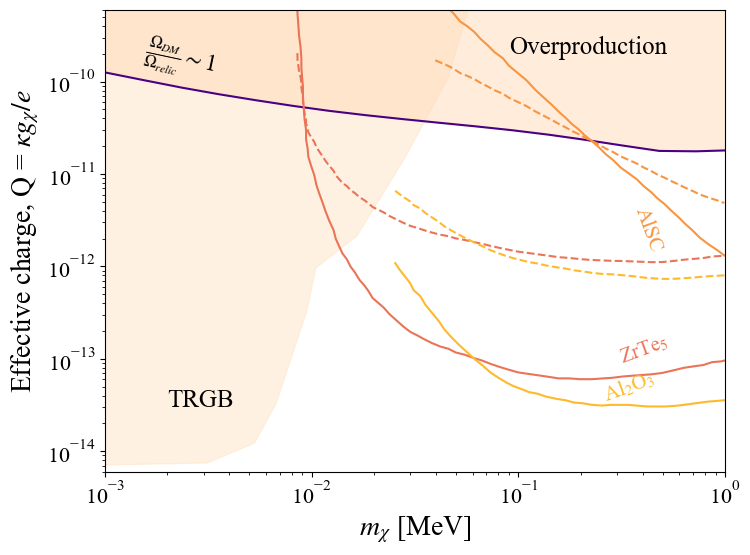

In [31]:
cmap = plt.get_cmap('plasma')
mlist = np.logspace(-6,2.7,num = 50)
f, ax = plt.subplots()
f.set_size_inches(8, 6)

ax.loglog(mlist,np.array([freeze_in_func(i) for i in mlist]),lw = 1.5, color = "indigo")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-3,1])
ax.fill_between(x/10**3,y,1, color = "bisque",alpha = 0.5,zorder = 0)
ax.fill_between(mlist,np.array([freeze_in_func(i) for i in mlist]),1,color = "peachpuff",alpha = 0.5,zorder = 1)
#ax.loglog(x/10**3,y, lw = 1, linestyle = "dashed",color = "gainsboro")
ax.set_ylim([6e-15, 6e-10])
ax.set_ylabel(r'Effective charge, Q = $\kappa g_\chi/e$', fontsize=20)
ax.set_xlabel(r'$m_\chi$ [MeV]', fontsize=20)

# constraints:
c=0.65
ax.loglog(ZTx,ZTy, color = cmap(c), lw = 1.5, linestyle = "solid")
ax.loglog(ZTx,newZT, color = cmap(c), lw = 1.5, linestyle = "dashed")
ax.text(3e-1, 0.9e-13, r'ZrTe$_5$', rotation=20, color=cmap(c), fontsize=15)

ax.loglog(ASx,ASy, color = cmap(c+0.1), lw = 1.5, linestyle = "solid")
ax.loglog(ASx,newAS, color = cmap(c+0.1), lw = 1.5, linestyle = "dashed")
ax.text(0.350, 1.5e-12, r'AlSC', rotation=-70, color=cmap(c+0.1), fontsize=15)

ax.loglog(AOx,AOy, color = cmap(c+0.2), lw = 1.5, linestyle = "solid")
ax.loglog(AOx,newAO, color = cmap(c+0.2), lw = 1.5, linestyle = "dashed")
ax.text(2.5e-1, 3.5e-14, r'Al$_2$O$_3$', rotation=20, color=cmap(c+0.2), fontsize=15)

ax.text(0.002, 0.00000000000003, r'TRGB',rotation=0,fontsize=18)
ax.text(0.09, 0.0000000002, r'Overproduction',rotation=0,fontsize=18)
ax.text(0.0015, 0.00000000013, r'$\frac{\Omega_{DM}}{\Omega_{relic}} \sim 1$',rotation=-12,fontsize=17)
#ax.text(0.000003, 0.00000000003, r'TRGB',rotation=0,fontsize=18)
#ax.text(0.008, 0.00000000006, r'Overproduction',rotation=0,fontsize=18)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

#ax.legend(loc='lower right',fontsize=12)
plt.show()